In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightningchart as lc

# Read the license key for LightningChart
my_license_key = 'P001-ZgAiXcls82XucLjGo1pNDBmgknE/FgAGIi2wGJsKgHy4pMYuLCxrxf4UXnNH-MEQCIE7WrKAMcHSuauBhMtQTwX3JPNSQPhQvdGJFy5GoAArCAiBsiHovJHY6pyh59fLdvj+QT5ld5MbewJXf7NsivQvsUw=='
lc.set_license(my_license_key)

# Load the dataset
file_path = '../Dataset/sonar.csv'
sonar_data = pd.read_csv(file_path, header=None)

# Data Processing
x = sonar_data.drop(columns=60, axis=1)
y = sonar_data[60]

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=1)

# Training the Model using Logistic Regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

# Evaluating the Model
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy of the training data: ", training_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy of the test data: ", test_data_accuracy)

# Making a Predictive System
input_data = (0.0260, 0.0363, 0.0136, 0.0272, 0.0214, 0.0338, 0.0655, 0.1400, 0.1843, 0.2354, 0.2720, 0.2442, 0.1665, 0.0336, 0.1302, 0.1708, 0.2177, 0.3175, 0.3714, 0.4552, 0.5700, 0.7397, 0.8062, 0.8837, 0.9432, 1.0000, 0.9375, 0.7603, 0.7123, 0.8358, 0.7622, 0.4567, 0.1715, 0.1549, 0.1641, 0.1869, 0.2655, 0.1713, 0.0959, 0.0768, 0.0847, 0.2076, 0.2505, 0.1862, 0.1439, 0.1470, 0.0991, 0.0041, 0.0154, 0.0116, 0.0181, 0.0146, 0.0129, 0.0047, 0.0039, 0.0061, 0.0040, 0.0036, 0.0061, 0.0115)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)

print(prediction)
if prediction[0] == "R":
    print("The object is a Rock")
else:
    print("The object is a mine")

# Visualization with LightningChart
chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Sonar Data Visualization'
)

# Customize x-axis
x_axis = chart.get_default_x_axis()
x_axis.set_title('Index')

# Customize y-axis
y_axis = chart.get_default_y_axis()
y_axis.set_title('Amplitude')

# Define colors for each series
colors = [
    lc.Color(0, 0, 255),    # Blue
    lc.Color(255, 0, 0),    # Red
    lc.Color(0, 255, 0),    # Green
    lc.Color(255, 255, 0),  # Yellow
    lc.Color(255, 165, 0),  # Orange
    lc.Color(0, 255, 255),  # Cyan
    lc.Color(255, 0, 255),  # Magenta
    lc.Color(128, 0, 128),  # Purple
    lc.Color(0, 128, 128),  # Teal
    lc.Color(128, 128, 0),  # Olive
    lc.Color(128, 0, 0),    # Maroon
    lc.Color(0, 128, 0)     # Dark Green
]

# Create a line series for each column
for i in range(x.shape[1]):
    line_series = chart.add_line_series()
    line_series.set_name(f'Column {i+1}')
    line_series.set_line_color(colors[i % len(colors)])
    line_series.set_line_thickness(2)
    line_series.add(range(len(x)), x[i].values.tolist())

# Add a legend to the chart
chart.add_legend(
    horizontal=False,
    title='Legend',
    data=chart
)

# Open the chart
chart.open()


Accuracy of the training data:  0.8342245989304813
Accuracy of the test data:  0.7619047619047619
['M']
The object is a mine


127.0.0.1 - - [08/Aug/2024 19:52:00] "GET / HTTP/1.1" 200 -


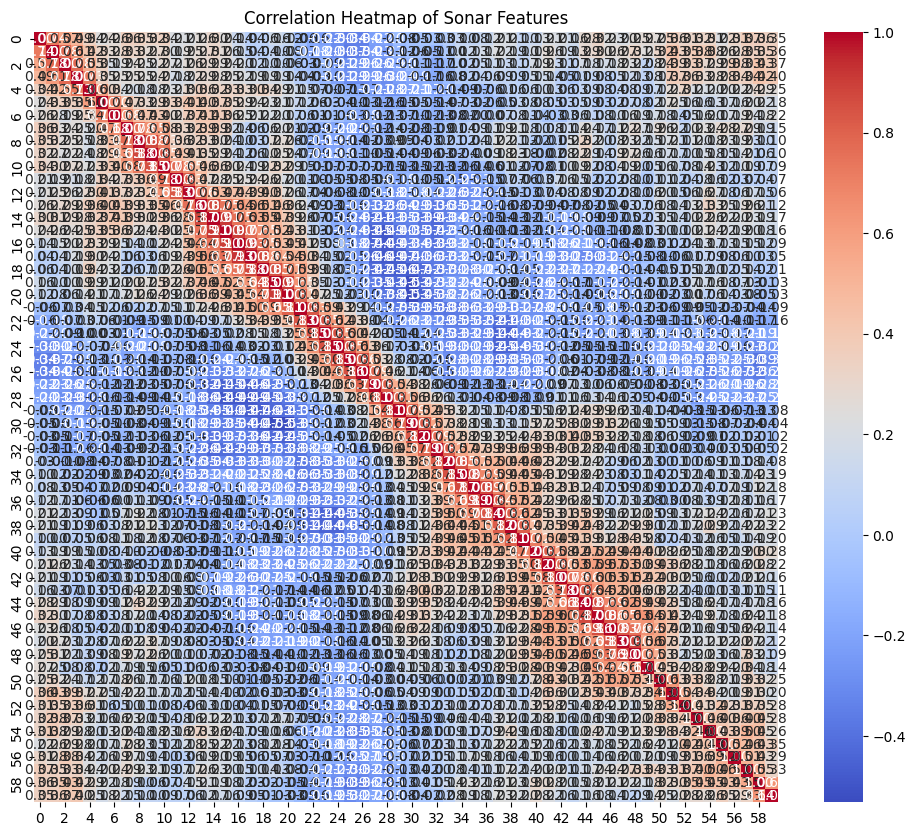

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
sonar_data = pd.read_csv(file_path, header=None)

# Drop the target column for correlation calculation
sonar_features = sonar_data.drop(columns=[60])

# Compute the correlation matrix
corr = sonar_features.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Sonar Features")
plt.show()


In [11]:
import pandas as pd
import numpy as np
import lightningchart as lc

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset

sonar_data = pd.read_csv(file_path, header=None)

# Drop the target column for correlation calculation
sonar_features = sonar_data.drop(columns=[60])

# Compute the correlation matrix
corr_matrix = sonar_features.corr()

# Convert the correlation matrix to a list of lists
heatmap_data = corr_matrix.values.tolist()

# Initialize the chart
chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Correlation Heatmap of Sonar Features'
)

# Create the heatmap series
series = chart.add_heatmap_grid_series(
    columns=len(heatmap_data),
    rows=len(heatmap_data[0])
)

# Set the data for the heatmap
series.hide_wireframe()
series.set_intensity_interpolation(False)
series.invalidate_intensity_values(heatmap_data)

# Define custom palette
series.set_palette_colors(
    steps=[
        {"value": -1.0, "color": lc.Color(255,255, 255)},  # Blue for negative correlation
        {"value": 0.0, "color": lc.Color(0, 0, 255)},  # White for no correlation
        {"value": 1.0, "color": lc.Color(255, 0, 0)}  # Red for positive correlation
    ],
    look_up_property='value',
    percentage_values=True
)

# Customize axes
x_axis = chart.get_default_x_axis()
x_axis.set_title('Feature Index')
x_axis.set_interval(0, sonar_features.shape[1])

y_axis = chart.get_default_y_axis()
y_axis.set_title('Feature Index')
y_axis.set_interval(0, sonar_features.shape[1])

# Open the chart in a browser
chart.open()


127.0.0.1 - - [08/Aug/2024 20:28:20] "GET / HTTP/1.1" 200 -


        0       1       2       3       4       5       6       7       8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

        9  ...      52      53      54      55      56      57      58  \
0  0.2111  ...  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  0.0090   
1  0.2872  ...  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049  0.0052   
2  0.6194  ...  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164  0.0095   
3  0.1264  ...  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044  0.0040   
4  0.4459  ...  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048  0.0107   

       59  60  Target  
0  0.0032   R       R  
1  0.0044   R       R  
2  0.0078   R       

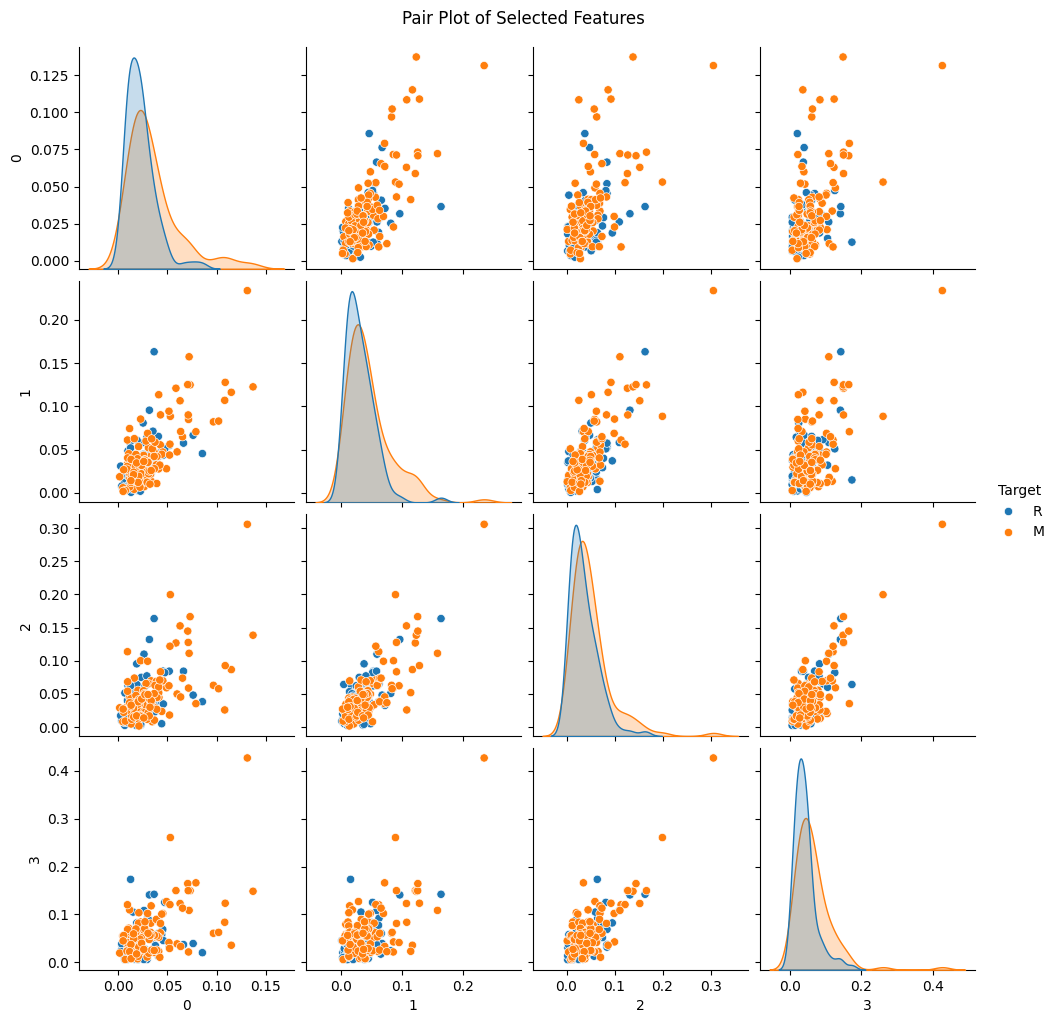

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the sonar dataset
file_path = '../Dataset/sonar.csv'
sonar_data = pd.read_csv(file_path, header=None)

# Separate features and labels
X = sonar_data.drop(columns=[60])
y = sonar_data[60]

# Add the target variable to the dataset for visualization
sonar_data['Target'] = y

# Check if the 'Target' column is added correctly
print(sonar_data.head())

# Generate a pair plot using the column names
sns.pairplot(sonar_data[[0, 1, 2, 3, 'Target']], hue='Target')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


In [32]:
import lightningchart as lc
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the sonar dataset
file_path = 'D:/wenprograming23/src/team6/Predicting-submarine-Sonar-object-recognition-in-Python/Dataset/sonar.csv'
sonar_data = pd.read_csv(file_path, header=None)

# Separate features and labels
X = sonar_data.drop(columns=[60])
y = sonar_data[60]

# Add the target variable to the dataset for visualization
sonar_data['Target'] = y

# Extract the relevant columns for the pair plot
columns = [0, 1, 2, 3]

# Create a Dashboard
dashboard = lc.Dashboard(
    rows=5,
    columns=4,
    theme=lc.Themes.Dark
)

def create_scatter_chart(dashboard, title, x_values, y_values, xlabel, ylabel, column_index, row_index):
    # Create the scatter plot chart
    chart = dashboard.ChartXY(
        column_index=column_index,
        row_index=row_index
    )
    chart.set_title(title)

    # Add the points to the scatter chart
    scatter_series = chart.add_point_series()
    scatter_series.add(x_values, y_values)

    # Set axis labels
    chart.get_default_x_axis().set_title(xlabel)
    chart.get_default_y_axis().set_title(ylabel)

# Create scatter plots for each pair and add them to the dashboard
for row_index, y_col in enumerate(columns):
    for column_index, x_col in enumerate(columns):
        x_values = X[x_col].astype(float).tolist()
        y_values = X[y_col].astype(float).tolist()
        title = f'{x_col} vs {y_col}'
        create_scatter_chart(dashboard, title, x_values, y_values, str(x_col), str(y_col), column_index, row_index)

# For the area charts, we need to compute the densities for each class (R and M)
R_data = sonar_data[sonar_data['Target'] == 'R']
M_data = sonar_data[sonar_data['Target'] == 'M']

# Calculate density for selected features
densities_R = {col: gaussian_kde(R_data[col]) for col in columns}
densities_M = {col: gaussian_kde(M_data[col]) for col in columns}

x_vals = {col: np.linspace(X[col].min(), X[col].max(), 100) for col in columns}
y_vals_R = {col: densities_R[col](x_vals[col]) for col in columns}
y_vals_M = {col: densities_M[col](x_vals[col]) for col in columns}

def create_area_chart(dashboard, title, x_vals, y_vals, label, column_index, row_index):
    chart = dashboard.ChartXY(column_index=column_index, row_index=row_index)
    chart.set_title(title)

    series = chart.add_positive_area_series()
    series.add(x_vals.tolist(), y_vals.tolist())
    series.set_name(label)

    chart.add_legend()
    chart.get_default_x_axis().set_title('Value')
    chart.get_default_y_axis().set_title('Density')

# Create area charts for each feature and add them to the dashboard
for idx, col in enumerate(columns):
    create_area_chart(dashboard, f'Density of Feature {col} (R)', x_vals[col], y_vals_R[col], 'R', idx % 2, 4)
    create_area_chart(dashboard, f'Density of Feature {col} (M)', x_vals[col], y_vals_M[col], 'M', idx % 2 + 2, 4)

# Open the dashboard in the default web browser
dashboard.open()


127.0.0.1 - - [08/Aug/2024 21:14:35] "GET / HTTP/1.1" 200 -
